# IE 532 Final Project

## <div color='red' style="background-color: orange; padding: 5px;"> Relationship Extraction and Network analysis of Mahabharata </div>
### Sumeet Jagtap, Prathmesh Rathod, Pradyumna Bada 

In [1]:
import pandas as pd
import numpy as np
import spacy #Using spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

## Data Extraction

In [2]:
#Installing english language model for spacy
!python3 -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.0 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
# Labeling it as Name Entity Recognition
NER = spacy.load("en_core_web_sm")
NER.max_length = 1500000

## Loading text files

In [4]:
import os
 
# Get all book files in the data directory
mhb_texts = [b for b in os.scandir('data') if '.txt' in b.name]

In [5]:
mhb_texts

[<DirEntry '01.txt'>,
 <DirEntry '02.txt'>,
 <DirEntry '03.txt'>,
 <DirEntry '07.txt'>,
 <DirEntry '06.txt'>,
 <DirEntry '10.txt'>,
 <DirEntry '04.txt'>,
 <DirEntry '05.txt'>,
 <DirEntry '08.txt'>,
 <DirEntry '09.txt'>]

#### We were facing an error with regards to the text length and memory allocation, the below code helped us to disable the ner and parser functions in the spacy package to save some memory and allow us to run the 1st text

In [6]:
doc = NER("The sentences we'd like to do lemmatization on", disable = ['ner', 'parser'])

In [7]:
#Opening 1st text to read
book = mhb_texts[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [8]:
#print([x.lemma_ for x in doc])

In [9]:
# Using Spacy's displacy feature to visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Loading Character Names

In [10]:
# Read characters
character_df = pd.read_csv("characters.csv")

In [11]:
character_df

NUMBER     character                                        description
0         0     Abhimanyu  son of Arjuna and Subhadra; husband of Uttarai...
1         1          Agni                                          fire-god.
2         2      Airavata                 elephant vehicle of the god Indra.
3         3          Amba  daughter of the king of Kashi; later reincarna...
4         4      Ambalika  daughter of the king of Kashi; wife of Vichitr...
..      ...           ...                                                ...
167     167     yakshinis                                    female yakshas.
168     168          Yama  god of death and of dharma; divine father of Y...
169     169  Yudhishthira  one of the five Pandava brothers; son of Kunti...
170     170         Yugas  four ages of the world in this order: Satya, T...
171     171       Yuyutsu  son of Dhritarashtra and Sughada, the maid of ...

[172 rows x 3 columns]

In [12]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [13]:
pd.set_option('display.max_rows', None)
character_df

NUMBER       character  \
0         0       Abhimanyu   
1         1            Agni   
2         2        Airavata   
3         3            Amba   
4         4        Ambalika   
5         5          Ambika   
6         6     Angaraparna   
7         7         apsaras   
8         8          Arjuna   
9         9       Ashwapati   
10       10       Ashwasena   
11       11     Ashwatthama   
12       12         Ashwins   
13       13          Astika   
14       14          asuras   
15       15            Baka   
16       16        Balarama   
17       17       Barbarika   
18       18      Bhagadatta   
19       19   Bhagavad-Gita   
20       20      Bharadwaja   
21       21           Bhima   
22       22         Bhishma   
23       23         Bhudevi   
24       24          Brahma   
25       25        brahmins   
26       26      Brihannala   
27       27      Chiranjivi   
28       28     Chitrangada   
29       29     Chitrangada   
30       30       Damayanti   
31       31      Dasharatha   
32       32           devas   
33       33       Devavrata   
34       34  Dhrishtadyumna   
35       35   Dhritarashtra   
36       36        Draupadi   
37       37           Drona   
38       38         Drupada   
39       39        Duhshala   
40       40         Durjaya   
41       41         Durvasa   
42       42      Duryodhana   
43       43       Dushasana   
44       44        Ekalavya   
45       45        Gandhari   
46       46      gandharvas   
47       47         Ganesha   
48       48           Ganga   
49       49     Ghatotkacha   
50       50       Granthika   
51       51            guru   
52       52         Hanuman   
53       53         Hidimba   
54       54         Hidimbi   
55       55    Hiranyavarna   
56       56           Indra   
57       57          Iravan   
58       58         Jaimini   
59       59      Janamejaya   
60       60            Jara   
61       61      Jayadratha   
62       62            Kali   
63       63           Kanka   
64       64           Karna   
65       65          Kashya   
66       66        Kauravas   
67       67         Kichaka   
68       68         Kindama   
69       69           Kripa   
70       70         Krishna   
71       71      Kritavarma   
72       72      kshatriyas   
73       73          Kubera   
74       74           Kunti   
75       75            Kuru   
76       76       Lakshmana   
77       77           Madri   
78       78      Mahabhisha   
79       79        Maitreya   
80       80        Mandavya   
81       81    Matsyagandha   
82       82        Mayasura   
83       83          Mohini   
84       84       Moudgalya   
85       85           nagas   
86       86         Nahusha   
87       87          Nakula   
88       88            Nala   
89       89        Nalayani   
90       90          Narada   
91       91        Pandavas   
92       92           Pandu   
93       93       Parashara   
94       94     Parashurama   
95       95       Parikshit   
96       96        Prabhasa   
97       97    Prativindhya   
98       98       Purochana   
99       99       Pururavas   
100     100       rakshasas   
101     101            Rama   
102     102          Ravana   
103     103          rishis   
104     104        Sahadeva   
105     105      Sairandhri   
106     106           Samba   
107     107         Sanjaya   
108     108     Saptarishis   
109     109         Satyaki   
110     110        Satyavan   
111     111       Satyavati   
112     112         Savitri   
113     113          Shachi   
114     114         Shakuni   
115     115          Shalva   
116     116          Shalya   
117     117        Shantanu   
118     118       Shatanika   
119     119     Shesha-Naga   
120     120      Shikhandin   
121     121     Shikhandini   
122     122      Shishupala   
123     123           Shiva   
124     124     Shrutakarma   
125     125      Shrutasena   
126     126       Shurasena   
127     127            Sita   
128   

## Get Named Entity list per sentence

In [14]:
sent_entity_df = []

# Creating a list to store named entity list for each sentence by looping through sentences
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [15]:
sent_entity_df

sentence  \
0     (The, Mahabharata, \n\n, of, \n\n, Krishna, -,...   
1     (Proofed, at, Distributed, Proofing, ,, \n, Ju...   
2     (Additional, proofing, and, formatting, at, \n...   
3                                               (Om, !)   
4     (After, having, bowed, down, to, Narayana, ,, ...   
5     (Tell, me, \n, what, I, have, to, do, for, the...   
6     (", Arjuna, said,--'O, great, Asura, ,, everyt...   
7                                  (Blest, be, thou, .)   
8              (Go, whithersoever, thou, \n, likest, .)   
9     (Be, kind, and, well, -, disposed, towards, me...   
10    (But, O, Bharata, ,, I, desire, to, do, someth...   
11    (I, am, a, great, artist, ,, a, Viswakarma, am...   
12    (O, son, of, \n, Pandu, ,, being, what, I, am,...   
13    (", Arjuna, said,--'O, sinless, one, ,, thou, ...   
14    (Even, if, it, hath, been, so, ,, I, can, not,...   
15    (At, the, same, time, ,, O, Danava, ,, I, do, ...   
16               (Do, thou, something, for, Krishna, .)   
17    (That, will, be, a, sufficient, \n, requital, ...   
18    (Vaisampayana, said,--"Then, ,, O, bull, of, t...   
19    (Krishna, ,, the, Lord, of, the, universe, and...   
20    (Indeed, ,, build, thou, such, a, palace, that...   
21    (And, ,, O, Maya, ,, build, \n, thou, a, mansi...   
22    (", \n\n, Vaisampayana, continued,--"Having, h...   
23    (And, he, forthwith, built, a, magnificent, pa...   
24    (Then, Krishna, \n, and, Partha, (, Arjuna, ),...   
25    (Yudhishthira, received, \n, Maya, with, respe...   
26    (And, ,, O, Bharata, ,, \n, Maya, accepted, th...   
27    (O, monarch, of, the, Bharata, \n, race, ,, th...   
28    (Agreeably, to, the, wishes, of, \n, both, Kri...   
29    (", \n\n\n\n, SECTION, II, \n\n, ", Vaisampaya...   
30    (That, possessor, of, large, eyes, ,, unto, wh...   
31    (Thus, revered, \n, by, Kesava, ,, Pritha, sme...   
32    (The, illustrious, \n, Hrishikesa, approached,...   
33    (The, \n, sweet, -, speeched, Subhadra, also, ...   
34    (And, bidding, her, farewell, and, uttering, \...   
35    (That, best, of, men, duly, made, obeisance, u...   
36    (Then, the, learned, and, \n, mighty, Krishna,...   
37    (And, \n, surrounded, by, the, five, brothers,...   
38    (He, whose, banner, bore, the, figure, of, Gar...   
39    (The, \n, bull, of, the, Yadu, race, then, wor...   
40    (Having, \n, finished, all, these, rites, ,, t...   
41    (The, chief, of, the, Yadu, race, then, came, ...   
42    (And, making, unto, them, presents, also, of, ...   
43    (Then, ascending, his, excellent, car, of, gol...   
44    (And, Yudhishthira, ,, the, king, of, the, Kur...   
45    (And, Arjuna, also, ,, of, long, \n, arms, ,, ...   
46    (And, the, mighty, Bhimasena, \n, accompanied,...   
47    (And, Kesava, ,, that, slayer, of, \n, hostile...   
48    (Then, Govinda, spoke, unto, Arjuna, and, \n, ...   
49    (And, embraced, in, return, by, the, three, el...   
50    (After, having, gone, about, half, a, Yojana, ...   
51    (And, Govinda, ,, conversant, with, every, dut...   
52    (But, Yudhishthira, soon, \n, raised, Kesava, ...   
53    (King, Yudhishthira, the, just, ,, the, son, o...   
54    (Then, \n, the, slayer, of, Madhu, ,, making, ...   
55    (Out, of, the, love, and, affection, \n, they,...   
56    (And, \n, Kesava, of, agreeable, person, soon,...   
57    (Those, bulls, among, men, ,, the, \n, sons, o...   
58    (And, Krishna, \n, in, his, car, soon, reached...   
59    (Then, \n, Sauri, ,, the, son, of, Devaki, ,, ...   
60    (", \n\n, Vaisampayana, continued,--"Meanwhile...   
61    (And, that, tiger, among, men, ,, dismissing, ...   
62    (And, Kesava, also, ,, worshipped, by, the, pr...   
63    (And, worshipping, his, old, father, and, his,...   
64    (Embracing, Pradyumna, ,, Shamva, ,, Nishatha,...   
65    (", \n\n\n\n, SECTION, III, \n\n, ", Vaisampay...   
66    (On, the, north, of, the, Kailasa, peak, near,...   
67    (This, was, placed, \n, in, t

In [16]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [17]:
#Checking identification of character names
filter_entity(["Arjuna"], character_df)

['Arjuna']

In [18]:
# Apply function
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

In [19]:
# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
4   (After, having, bowed, down, to, Narayana, ,, ...   
6   (", Arjuna, said,--'O, great, Asura, ,, everyt...   
12  (O, son, of, \n, Pandu, ,, being, what, I, am,...   
13  (", Arjuna, said,--'O, sinless, one, ,, thou, ...   
16             (Do, thou, something, for, Krishna, .)   
19  (Krishna, ,, the, Lord, of, the, universe, and...   
23  (And, he, forthwith, built, a, magnificent, pa...   
24  (Then, Krishna, \n, and, Partha, (, Arjuna, ),...   
25  (Yudhishthira, received, \n, Maya, with, respe...   
27  (O, monarch, of, the, Bharata, \n, race, ,, th...   

                                             entities  \
4   [Narayana, Nara, Saraswati, Jaya, Vaisampayana...   
6                                     [Arjuna, Asura]   
12                                            [Pandu]   
13                                           [Arjuna]   
16                                          [Krishna]   
19  [Krishna, the Creator, thou choosest, Diti, Yu...   
23                                            [Pandu]   
24              [Krishna, Partha, Yudhishthira, Maya]   
25                               [Yudhishthira, Maya]   
27        [Bharata, Diti, Pandu, Vrisha-parva, Pandu]   

          character_entities  
4   [Arjuna, Kunti, Krishna]  
6                   [Arjuna]  
12                   [Pandu]  
13                  [Arjuna]  
16                 [Krishna]  
19   [Krishna, Yudhishthira]  
23                   [Pandu]  
24   [Krishna, Yudhishthira]  
25            [Yudhishthira]  
27            [Pandu, Pandu]

In [20]:
#Taking only 1st names of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

/var/folders/6f/vgnwgb491d178h4b4skms6g00000gn/T/ipykernel_8739/557582460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [21]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
4     (After, having, bowed, down, to, Narayana, ,, ...   
6     (", Arjuna, said,--'O, great, Asura, ,, everyt...   
12    (O, son, of, \n, Pandu, ,, being, what, I, am,...   
13    (", Arjuna, said,--'O, sinless, one, ,, thou, ...   
16               (Do, thou, something, for, Krishna, .)   
...                                                 ...   
3410  (Therefore, ,, O, king, ,, not, hostility, but...   
3411  (The, \n, sons, of, Pandu, are, always, strong...   
3412  (Thou, knowest, ,, O, king, ,, \n, that, the, ...   
3413  (Therefore, ,, O, bull, of, the, Bharata, race...   
3416  (It, was, thus, ,, O, son, of, \n, Gavalgani, ...   

                                               entities  \
4     [Narayana, Nara, Saraswati, Jaya, Vaisampayana...   
6                                       [Arjuna, Asura]   
12                                              [Pandu]   
13                                             [Arjuna]   
16                                            [Krishna]   
...                                                 ...   
3410                                            [Pandu]   
3411                                     [Pandu, Kurus]   
3412                  [Thou knowest, Jarasandha, Bhima]   
3413                         [Bharata, behoveth, Pandu]   
3416                                [Gavalgani, Vidura]   

            character_entities  
4     [Arjuna, Kunti, Krishna]  
6                     [Arjuna]  
12                     [Pandu]  
13                    [Arjuna]  
16                   [Krishna]  
...                        ...  
3410                   [Pandu]  
3411                   [Pandu]  
3412                   [Bhima]  
3413                   [Pandu]  
3416                  [Vidura]  

[1107 rows x 3 columns]

## Create relationships

In [22]:
#Setting a window size of 5 sentences - observing characters that appear in the same window of 5 sentences 
window_size = 5
#Empty list to create edges between characters that appear next to each other
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    #ensuring we don't exceed the max rows in dataframe in the last few rows, hence taking min i+5
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1: #ensuring we don't create self-edges, or edges to the same character
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b}) #First char taken as source and 2nd as target

In [23]:
relationship_df = pd.DataFrame(relationships)

In [24]:
pd.set_option('display.max_rows', None)
relationship_df

source          target
0             Arjuna           Kunti
1              Kunti         Krishna
2             Arjuna           Kunti
3              Kunti         Krishna
4            Krishna          Arjuna
5             Arjuna           Kunti
6              Kunti         Krishna
7            Krishna          Arjuna
8             Arjuna           Kunti
9              Kunti         Krishna
10           Krishna          Arjuna
11            Arjuna           Kunti
12             Kunti         Krishna
13           Krishna          Arjuna
14             Pandu          Arjuna
15             Pandu          Arjuna
16             Pandu          Arjuna
17             Pandu          Arjuna
18            Arjuna         Krishna
19             Pandu          Arjuna
20            Arjuna         Krishna
21            Arjuna         Krishna
22           Krishna    Yudhishthira
23           Krishna    Yudhishthira
24           Krishna    Yudhishthira
25           Krishna    Yudhishthira
26           Krishna    Yudhishthira
27      Yudhishthira           Pandu
28           Krishna    Yudhishthira
29      Yudhishthira           Pandu
30             Pandu         Krishna
31           Krishna    Yudhishthira
32             Pandu         Krishna
33           Krishna    Yudhishthira
34             Pandu         Krishna
35           Krishna    Yudhishthira
36             Pandu         Krishna
37           Krishna    Yudhishthira
38      Yudhishthira           Pandu
39             Pandu         Krishna
40           Krishna    Yudhishthira
41      Yudhishthira           Pandu
42             Pandu         Krishna
43           Krishna    Yudhishthira
44      Yudhishthira           Pandu
45             Pandu         Krishna
46      Yudhishthira           Pandu
47             Pandu         Krishna
48           Krishna    Yudhishthira
49      Yudhishthira           Kunti
50             Pandu         Krishna
51           Krishna    Yudhishthira
52      Yudhishthira           Kunti
53             Pandu         Krishna
54           Krishna    Yudhishthira
55      Yudhishthira           Kunti
56             Kunti        Subhadra
57           Krishna    Yudhishthira
58      Yudhishthira           Kunti
59             Kunti        Subhadra
60      Yudhishthira           Kunti
61             Kunti        Subhadra
62      Yudhishthira           Kunti
63             Kunti        Subhadra
64          Subhadra        Draupadi
65          Subhadra        Draupadi
66          Draupadi         Krishna
67          Subhadra        Draupadi
68          Draupadi         Krishna
69          Subhadra        Draupadi
70          Draupadi         Krishna
71          Draupadi         Krishna
72           Krishna            Yadu
73          Draupadi         Krishna
74           Krishna            Yadu
75           Krishna            Yadu
76           Krishna            Yadu
77              Yadu    Yudhishthira
78      Yudhishthira         Krishna
79              Yadu    Yudhishthira
80      Yudhishthira         Krishna
81           Krishna          Arjuna
82            Arjuna         Krishna
83              Yadu    Yudhishthira
84      Yudhishthira         Krishna
85           Krishna          Arjuna
86            Arjuna         Krishna
87           Krishna          Nakula
88            Nakula        Sahadeva
89          Sahadeva         Krishna
90      Yudhishthira         Krishna
91           Krishna          Arjuna
92            Arjuna         Krishna
93           Krishna          Nakula
94            Nakula        Sahadeva
95          Sahadeva         Krishna
96      Yudhishthira         Krishna
97           Krishna          Arjuna
98            Arjuna         Krishna
99           Krishna          Nakula
100           Nakula        Sahadeva
101         Sahadeva         Krishna
102          Krishna          Arjuna
103           Arjuna           Bhima
104     Yudhishthira         Krishna
105          Krishna          Arjuna
106           Arjuna         Krishna
107          Krish

In [25]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source         target
0             Arjuna          Kunti
1            Krishna          Kunti
2             Arjuna          Kunti
3            Krishna          Kunti
4             Arjuna        Krishna
5             Arjuna          Kunti
6            Krishna          Kunti
7             Arjuna        Krishna
8             Arjuna          Kunti
9            Krishna          Kunti
10            Arjuna        Krishna
11            Arjuna          Kunti
12           Krishna          Kunti
13            Arjuna        Krishna
14            Arjuna          Pandu
15            Arjuna          Pandu
16            Arjuna          Pandu
17            Arjuna          Pandu
18            Arjuna        Krishna
19            Arjuna          Pandu
20            Arjuna        Krishna
21            Arjuna        Krishna
22           Krishna   Yudhishthira
23           Krishna   Yudhishthira
24           Krishna   Yudhishthira
25           Krishna   Yudhishthira
26           Krishna   Yudhishthira
27             Pandu   Yudhishthira
28           Krishna   Yudhishthira
29             Pandu   Yudhishthira
30           Krishna          Pandu
31           Krishna   Yudhishthira
32           Krishna          Pandu
33           Krishna   Yudhishthira
34           Krishna          Pandu
35           Krishna   Yudhishthira
36           Krishna          Pandu
37           Krishna   Yudhishthira
38             Pandu   Yudhishthira
39           Krishna          Pandu
40           Krishna   Yudhishthira
41             Pandu   Yudhishthira
42           Krishna          Pandu
43           Krishna   Yudhishthira
44             Pandu   Yudhishthira
45           Krishna          Pandu
46             Pandu   Yudhishthira
47           Krishna          Pandu
48           Krishna   Yudhishthira
49             Kunti   Yudhishthira
50           Krishna          Pandu
51           Krishna   Yudhishthira
52             Kunti   Yudhishthira
53           Krishna          Pandu
54           Krishna   Yudhishthira
55             Kunti   Yudhishthira
56             Kunti       Subhadra
57           Krishna   Yudhishthira
58             Kunti   Yudhishthira
59             Kunti       Subhadra
60             Kunti   Yudhishthira
61             Kunti       Subhadra
62             Kunti   Yudhishthira
63             Kunti       Subhadra
64          Draupadi       Subhadra
65          Draupadi       Subhadra
66          Draupadi        Krishna
67          Draupadi       Subhadra
68          Draupadi        Krishna
69          Draupadi       Subhadra
70          Draupadi        Krishna
71          Draupadi        Krishna
72           Krishna           Yadu
73          Draupadi        Krishna
74           Krishna           Yadu
75           Krishna           Yadu
76           Krishna           Yadu
77              Yadu   Yudhishthira
78           Krishna   Yudhishthira
79              Yadu   Yudhishthira
80           Krishna   Yudhishthira
81            Arjuna        Krishna
82            Arjuna        Krishna
83              Yadu   Yudhishthira
84           Krishna   Yudhishthira
85            Arjuna        Krishna
86            Arjuna        Krishna
87           Krishna         Nakula
88            Nakula       Sahadeva
89           Krishna       Sahadeva
90           Krishna   Yudhishthira
91            Arjuna        Krishna
92            Arjuna        Krishna
93           Krishna         Nakula
94            Nakula       Sahadeva
95           Krishna       Sahadeva
96           Krishna   Yudhishthira
97            Arjuna        Krishna
98            Arjuna        Krishna
99           Krishna         Nakula
100           Nakula       Sahadeva
101          Krishna       Sahadeva
102           Arjuna        Krishna
103           Arjuna          Bhima
104          Krishna   Yudhishthira
105           Arjuna        Krishna
106           Arjuna        Krishna
107          Krishna         Nakula
108           Nakula       Sahadeva
109          Krishna       Sahadeva
110           Arju

In [26]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()
relationship_df = relationship_df.sort_values(by="value", ascending=False)
relationship_df.head(10)

source        target  value
16          Arjuna         Bhima    170
5            Pandu  Yudhishthira    163
2           Arjuna       Krishna    130
4          Krishna  Yudhishthira    125
32        Pandavas  Yudhishthira    110
89           Bhima       Krishna    110
7            Kunti  Yudhishthira    109
217  Dhritarashtra    Duryodhana    106
207     Duryodhana  Yudhishthira    103
18         Krishna      Pandavas    101

## Graph analysis and visualization

In [27]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, source = "source", target = "target", edge_attr = "value", create_using = nx.Graph())

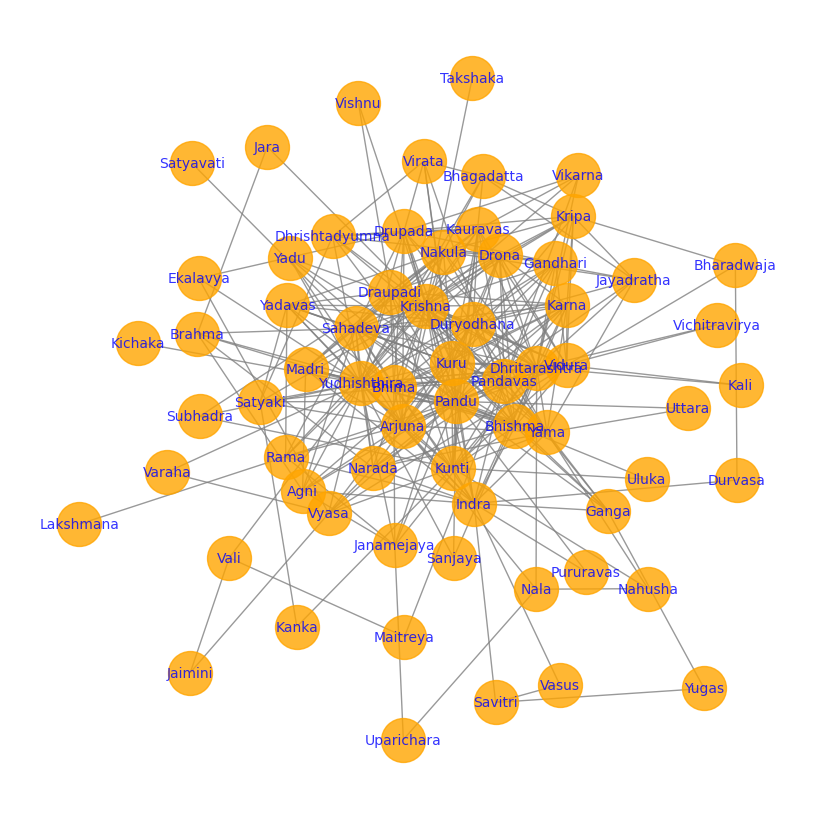

In [28]:
plt.figure(figsize=(8,8))
pos = nx.kamada_kawai_layout(G) #using more aesthetic layout
nx.draw(G, pos, with_labels=True, node_color='orange', font_size = 10, edge_cmap=plt.cm.Blues, edge_color = 'grey', node_size = 1000, alpha = 0.8, font_color = 'blue')
#edge_cmap=plt.cm.Blues
plt.show()

## Graph Visualization using Pyvis

In [29]:
from pyvis.network import Network

net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
net.repulsion()

node_degree = dict(G.degree)

#Setting node size attribute based on degree of character
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show_buttons(filter_=['physics'])
net.show("mahabharat.html")

mahabharat.html


## Finding degrees of characters

In [30]:
degrees = dict(G.degree)
sorted_degrees = dict(sorted(degrees.items(), key=lambda item: item[1], reverse=True))
sorted_degrees

{'Yudhishthira': 38,
 'Pandu': 37,
 'Krishna': 32,
 'Dhritarashtra': 28,
 'Kuru': 27,
 'Pandavas': 25,
 'Arjuna': 23,
 'Sahadeva': 23,
 'Duryodhana': 22,
 'Bhima': 21,
 'Kunti': 20,
 'Vidura': 20,
 'Draupadi': 20,
 'Indra': 20,
 'Yama': 19,
 'Bhishma': 17,
 'Drona': 17,
 'Drupada': 16,
 'Karna': 15,
 'Nakula': 14,
 'Kauravas': 13,
 'Kripa': 12,
 'Yadavas': 12,
 'Narada': 11,
 'Madri': 10,
 'Gandhari': 10,
 'Agni': 9,
 'Vyasa': 9,
 'Rama': 9,
 'Dhrishtadyumna': 9,
 'Janamejaya': 8,
 'Satyaki': 8,
 'Jayadratha': 8,
 'Ganga': 7,
 'Bhagadatta': 6,
 'Virata': 6,
 'Brahma': 6,
 'Yadu': 5,
 'Vikarna': 5,
 'Nala': 4,
 'Subhadra': 3,
 'Sanjaya': 3,
 'Nahusha': 3,
 'Savitri': 3,
 'Vali': 3,
 'Bharadwaja': 3,
 'Ekalavya': 3,
 'Vishnu': 2,
 'Durvasa': 2,
 'Jara': 2,
 'Uparichara': 2,
 'Jaimini': 2,
 'Maitreya': 2,
 'Kali': 2,
 'Vasus': 2,
 'Yugas': 2,
 'Kanka': 2,
 'Varaha': 2,
 'Vichitravirya': 2,
 'Pururavas': 2,
 'Uttara': 2,
 'Uluka': 2,
 'Lakshmana': 1,
 'Kichaka': 1,
 'Takshaka': 1,
 'Satyav

## The most important characters in Mahabharat

In [31]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict = dict(sorted(degree_dict.items(), key=lambda item: item[1], reverse=True))
degree_dict

{'Yudhishthira': 0.5846153846153846,
 'Pandu': 0.5692307692307692,
 'Krishna': 0.49230769230769234,
 'Dhritarashtra': 0.4307692307692308,
 'Kuru': 0.4153846153846154,
 'Pandavas': 0.38461538461538464,
 'Arjuna': 0.35384615384615387,
 'Sahadeva': 0.35384615384615387,
 'Duryodhana': 0.3384615384615385,
 'Bhima': 0.3230769230769231,
 'Kunti': 0.3076923076923077,
 'Vidura': 0.3076923076923077,
 'Draupadi': 0.3076923076923077,
 'Indra': 0.3076923076923077,
 'Yama': 0.2923076923076923,
 'Bhishma': 0.26153846153846155,
 'Drona': 0.26153846153846155,
 'Drupada': 0.24615384615384617,
 'Karna': 0.23076923076923078,
 'Nakula': 0.2153846153846154,
 'Kauravas': 0.2,
 'Kripa': 0.18461538461538463,
 'Yadavas': 0.18461538461538463,
 'Narada': 0.16923076923076924,
 'Madri': 0.15384615384615385,
 'Gandhari': 0.15384615384615385,
 'Agni': 0.13846153846153847,
 'Vyasa': 0.13846153846153847,
 'Rama': 0.13846153846153847,
 'Dhrishtadyumna': 0.13846153846153847,
 'Janamejaya': 0.12307692307692308,
 'Satyaki'

Text(0, 0.5, 'Degree Centrality')

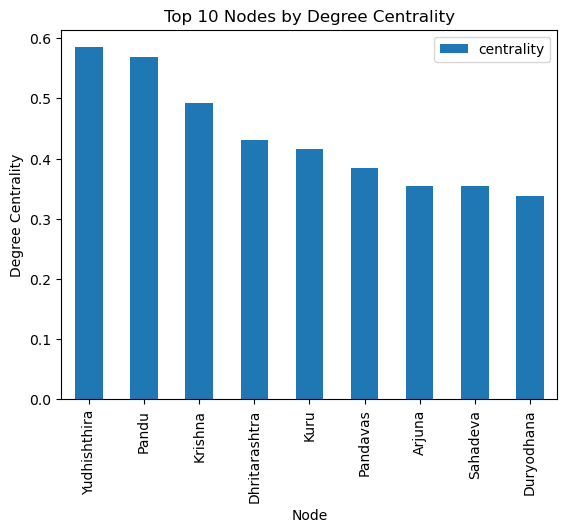

In [32]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")
plt.title('Top 10 Nodes by Degree Centrality')
plt.xlabel('Node')
plt.ylabel('Degree Centrality')

Text(0, 0.5, 'Betweenness Centrality')

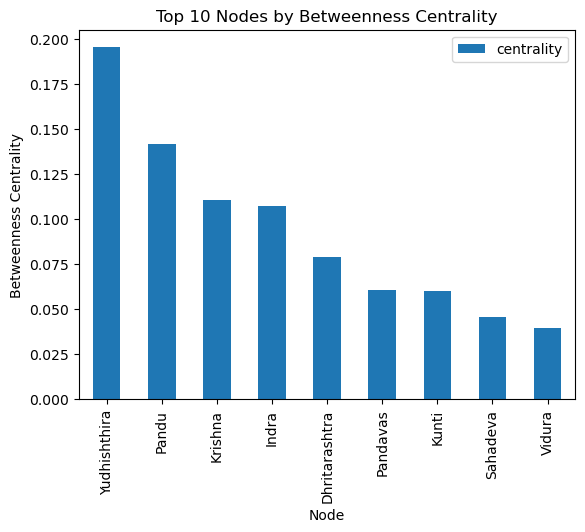

In [33]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")
plt.title('Top 10 Nodes by Betweenness Centrality')
plt.xlabel('Node')
plt.ylabel('Betweenness Centrality')

Text(0, 0.5, 'Closeness Centrality')

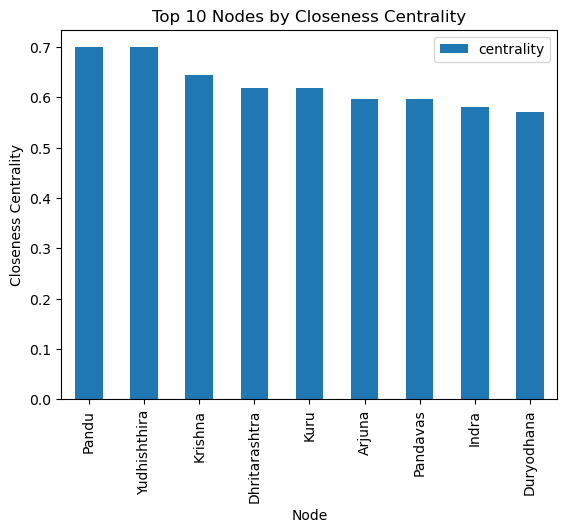

In [34]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")
plt.title('Top 10 Nodes by Closeness Centrality')
plt.xlabel('Node')
plt.ylabel('Closeness Centrality')

In [35]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

## Community detection

In [36]:
import community as community_louvain

In [37]:
communities = community_louvain.best_partition(G)
communities

{'Arjuna': 0,
 'Bhima': 1,
 'Pandu': 2,
 'Yudhishthira': 3,
 'Krishna': 1,
 'Pandavas': 1,
 'Kunti': 3,
 'Dhritarashtra': 1,
 'Duryodhana': 1,
 'Vidura': 1,
 'Bhishma': 1,
 'Drona': 1,
 'Nakula': 4,
 'Sahadeva': 0,
 'Draupadi': 1,
 'Kripa': 4,
 'Narada': 2,
 'Kuru': 1,
 'Karna': 1,
 'Agni': 0,
 'Indra': 2,
 'Yadu': 1,
 'Kauravas': 1,
 'Drupada': 1,
 'Yadavas': 1,
 'Madri': 0,
 'Vishnu': 1,
 'Janamejaya': 0,
 'Yama': 2,
 'Vikarna': 1,
 'Subhadra': 3,
 'Satyaki': 3,
 'Vyasa': 3,
 'Bhagadatta': 4,
 'Durvasa': 4,
 'Gandhari': 1,
 'Virata': 1,
 'Lakshmana': 0,
 'Rama': 0,
 'Jayadratha': 4,
 'Sanjaya': 2,
 'Dhrishtadyumna': 1,
 'Kichaka': 3,
 'Brahma': 0,
 'Jara': 1,
 'Nala': 0,
 'Nahusha': 0,
 'Uparichara': 0,
 'Savitri': 2,
 'Jaimini': 3,
 'Vali': 3,
 'Maitreya': 3,
 'Kali': 1,
 'Bharadwaja': 4,
 'Ekalavya': 3,
 'Vasus': 2,
 'Yugas': 2,
 'Kanka': 3,
 'Varaha': 3,
 'Vichitravirya': 1,
 'Takshaka': 1,
 'Pururavas': 2,
 'Ganga': 2,
 'Uttara': 2,
 'Uluka': 3,
 'Satyavati': 0}

In [38]:
nx.set_node_attributes(G, communities, 'group')

In [39]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.repulsion() # for static plot
com_net.from_nx(G)
com_net.show("mahabharata_communities.html")

mahabharata_communities.html


## Evolution of characters' importance

In [40]:
from lib.utils.functions import *

In [41]:
# Initialize empty list for graphs from books
books_graph = []
mhb_texts = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")
NER.max_length = 2000000

# Sort dir entries by name
mhb_texts.sort(key=lambda x: x.name)

In [42]:
# Loop through book list and create graphs
#for counter, book in enumerate(mhb_texts, start=1):
for book in mhb_texts:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)
    #print(f"Processed book {counter}")

/var/folders/6f/vgnwgb491d178h4b4skms6g00000gn/T/ipykernel_8739/1099726246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/var/folders/6f/vgnwgb491d178h4b4skms6g00000gn/T/ipykernel_8739/1099726246.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
/v

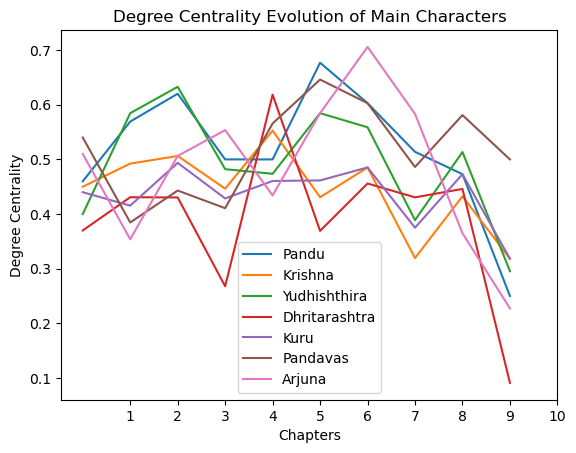

In [45]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)
ax = degree_evol_df[["Pandu", "Krishna", "Yudhishthira", "Dhritarashtra", "Kuru", "Pandavas", "Arjuna"]].plot()

# Plotting the degree centrality evolution of 5 main characters
ax.set_title('Degree Centrality Evolution of Main Characters')
ax.set_xlabel('Chapters')
ax.set_ylabel('Degree Centrality')
tick_positions = range(1, 11)
ax.set_xticks(tick_positions)